##**Import Packages**

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.config.run_functions_eagerly(True)
import numpy as np
import pandas as pd
import sklearn
import pickle
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##**Import Data & Labelling**

In [ ]:
import pandas as pd

url_data = 'https://raw.githubusercontent.com/zakkutachibana/FoodMoodFinderCapstone/main/Machine%20Learning/dataset/dataset.csv'
data = pd.read_csv(url_data)

print(data)


                  Makanan             Karbohidrat          Protein  Sayur  \
0             Sosis Bakar               Tidak ada  Ayam dan daging  Tidak   
1     Ngohiong Ayam Udang               Tidak ada          Lainnya  Tidak   
2              Rawon Ayam               Tidak ada  Ayam dan daging     Ya   
3      Usus Goreng Crispy               Tidak ada  Ayam dan daging  Tidak   
4         Ceker Rica Rica               Tidak ada  Ayam dan daging  Tidak   
...                   ...                     ...              ...    ...   
1223                Lotek  Tepung, Mie, dan Pasta        Tidak ada     Ya   
1224            Guacamole               Tidak ada        Tidak ada  Tidak   
1225      Asinan Rambutan               Tidak ada        Tidak ada  Tidak   
1226          Asinan Buah               Tidak ada        Tidak ada  Tidak   
1227             Sop Buah               Tidak ada        Tidak ada  Tidak   

               Pengolahan  
0     Panggang atau bakar  
1       Goreng atau

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#import dataset_capstone.csv
#data = pd.read_csv("/content/drive/MyDrive/Capstone/dataset_capstone.csv")

In [ ]:
data

,Makanan,Karbohidrat,Protein,Sayur,Pengolahan
0,Sosis Bakar,Tidak ada,Ayam dan daging,Tidak,Panggang atau bakar
1,Ngohiong Ayam Udang,Tidak ada,Lainnya,Tidak,Goreng atau tumis
2,Rawon Ayam,Tidak ada,Ayam dan daging,Ya,Rebus atau kukus
3,Usus Goreng Crispy,Tidak ada,Ayam dan daging,Tidak,Goreng atau tumis
4,Ceker Rica Rica,Tidak ada,Ayam dan daging,Tidak,Goreng atau tumis
...,...,...,...,...,...
1223,Lotek,"Tepung, Mie, dan Pasta",Tidak ada,Ya,Lainnya
1224,Guacamole,Tidak ada,Tidak ada,Tidak,Lainnya
1225,Asinan Rambutan,Tidak ada,Tidak ada,Tidak,Lainnya
1226,Asinan Buah,Tidak ada,Tidak ada,Tidak,Lainnya


In [ ]:
data.shape

(1228, 5)

In [ ]:
data.isna().sum()

Makanan        0
Karbohidrat    0
Protein        0
Sayur          0
Pengolahan     0
dtype: int64

In [ ]:
#data = data.dropna()

In [ ]:
import pandas as pd

url_class = 'https://raw.githubusercontent.com/zakkutachibana/FoodMoodFinderCapstone/main/Machine%20Learning/dataset/class_1.1.0.csv'
list_class = pd.read_csv(url_class)

print(list_class)

    Karbohidrat    Protein  Sayur           Pengolahan  Kelas_x
0     Tidak ada  Tidak ada  Tidak              Lainnya       23
1     Tidak ada  Tidak ada  Tidak    Goreng atau tumis       22
2     Tidak ada  Tidak ada  Tidak  Panggang atau bakar       22
3     Tidak ada  Tidak ada  Tidak     Rebus atau kukus       23
4     Tidak ada  Tidak ada     Ya              Lainnya       17
..          ...        ...    ...                  ...      ...
155     Lainnya    Lainnya  Tidak     Rebus atau kukus       23
156     Lainnya    Lainnya     Ya              Lainnya       17
157     Lainnya    Lainnya     Ya    Goreng atau tumis       16
158     Lainnya    Lainnya     Ya  Panggang atau bakar       16
159     Lainnya    Lainnya     Ya     Rebus atau kukus       17

[160 rows x 5 columns]


In [ ]:
#inner join based on the same column
data = pd.merge(data, list_class, on=['Karbohidrat', 'Protein', 'Sayur', 'Pengolahan'], how='inner')

#merge class values according to the first dataset
data['Kelas'] = data['Kelas_x']

#display only the columns 'Karbohidrat', 'Protein', 'Sayur', 'Pengolahan', dan 'Kelas'
data = data[['Makanan','Karbohidrat', 'Protein', 'Sayur', 'Pengolahan', 'Kelas']]

#display the merge result with the merged class values
print(data)

                     Makanan             Karbohidrat          Protein  Sayur  \
0                Sosis Bakar               Tidak ada  Ayam dan daging  Tidak   
1              Yakitori Ayam               Tidak ada  Ayam dan daging  Tidak   
2     Ayam Bakar Bumbu Rujak               Tidak ada  Ayam dan daging  Tidak   
3          Ayam Bakar Klaten               Tidak ada  Ayam dan daging  Tidak   
4           Ayam Goreng Cabe               Tidak ada  Ayam dan daging  Tidak   
...                      ...                     ...              ...    ...   
1223           Singkong Keju                 Lainnya          Lainnya  Tidak   
1224   Puding Ombre Ubi Ungu                 Lainnya          Lainnya  Tidak   
1225          Manisan Mangga               Tidak ada        Tidak ada  Tidak   
1226                 Sarabba               Tidak ada        Tidak ada  Tidak   
1227                   Lotek  Tepung, Mie, dan Pasta        Tidak ada     Ya   

               Pengolahan  Kelas  
0   

In [ ]:
data.isna().sum()

Makanan        0
Karbohidrat    0
Protein        0
Sayur          0
Pengolahan     0
Kelas          0
dtype: int64

In [ ]:
import pandas as pd

url_image = 'https://raw.githubusercontent.com/zakkutachibana/FoodMoodFinderCapstone/main/Machine%20Learning/dataset/image_dataset.csv'
image = pd.read_csv(url_image)

print(image)

                     Makanan  \
0                Sosis Bakar   
1              Yakitori Ayam   
2     Ayam Bakar Bumbu Rujak   
3          Ayam Bakar Klaten   
4           Ayam Goreng Cabe   
...                      ...   
1223           Singkong Keju   
1224   Puding Ombre Ubi Ungu   
1225          Manisan Mangga   
1226                 Sarabba   
1227                   Lotek   

                                                 Gambar  
0     https://i0.wp.com/resepkoki.id/wp-content/uplo...  
1     https://i0.wp.com/resepkoki.id/wp-content/uplo...  
2     https://i0.wp.com/resepkoki.id/wp-content/uplo...  
3     https://i0.wp.com/resepkoki.id/wp-content/uplo...  
4     https://i0.wp.com/resepkoki.id/wp-content/uplo...  
...                                                 ...  
1223  https://i0.wp.com/resepkoki.id/wp-content/uplo...  
1224  https://i0.wp.com/resepkoki.id/wp-content/uplo...  
1225  https://i0.wp.com/resepkoki.id/wp-content/uplo...  
1226  https://i0.wp.com/resepkoki.i

In [ ]:
#inner join based on the same column
data = pd.merge(data, image, on=['Makanan'], how='inner')

#merge class values according to the first dataset
data['Gambar'] = data['Gambar']

#display only the columns 'Karbohidrat', 'Protein', 'Sayur', 'Pengolahan', dan 'Kelas'
data = data[['Makanan','Karbohidrat', 'Protein', 'Sayur', 'Pengolahan', 'Kelas','Gambar']]

#display the merge result with the merged class values
print(data)

                     Makanan             Karbohidrat          Protein  Sayur  \
0                Sosis Bakar               Tidak ada  Ayam dan daging  Tidak   
1              Yakitori Ayam               Tidak ada  Ayam dan daging  Tidak   
2     Ayam Bakar Bumbu Rujak               Tidak ada  Ayam dan daging  Tidak   
3          Ayam Bakar Klaten               Tidak ada  Ayam dan daging  Tidak   
4           Ayam Goreng Cabe               Tidak ada  Ayam dan daging  Tidak   
...                      ...                     ...              ...    ...   
1223           Singkong Keju                 Lainnya          Lainnya  Tidak   
1224   Puding Ombre Ubi Ungu                 Lainnya          Lainnya  Tidak   
1225          Manisan Mangga               Tidak ada        Tidak ada  Tidak   
1226                 Sarabba               Tidak ada        Tidak ada  Tidak   
1227                   Lotek  Tepung, Mie, dan Pasta        Tidak ada     Ya   

               Pengolahan  Kelas  \
0  

In [ ]:
data

,Makanan,Karbohidrat,Protein,Sayur,Pengolahan,Kelas,Gambar
0,Sosis Bakar,Tidak ada,Ayam dan daging,Tidak,Panggang atau bakar,18,https://i0.wp.com/resepkoki.id/wp-content/uplo...
1,Yakitori Ayam,Tidak ada,Ayam dan daging,Tidak,Panggang atau bakar,18,https://i0.wp.com/resepkoki.id/wp-content/uplo...
2,Ayam Bakar Bumbu Rujak,Tidak ada,Ayam dan daging,Tidak,Panggang atau bakar,18,https://i0.wp.com/resepkoki.id/wp-content/uplo...
3,Ayam Bakar Klaten,Tidak ada,Ayam dan daging,Tidak,Panggang atau bakar,18,https://i0.wp.com/resepkoki.id/wp-content/uplo...
4,Ayam Goreng Cabe,Tidak ada,Ayam dan daging,Tidak,Panggang atau bakar,18,https://i0.wp.com/resepkoki.id/wp-content/uplo...
...,...,...,...,...,...,...,...
1223,Singkong Keju,Lainnya,Lainnya,Tidak,Goreng atau tumis,22,https://i0.wp.com/resepkoki.id/wp-content/uplo...
1224,Puding Ombre Ubi Ungu,Lainnya,Lainnya,Tidak,Rebus atau kukus,23,https://i0.wp.com/resepkoki.id/wp-content/uplo...
1225,Manisan Mangga,Tidak ada,Tidak ada,Tidak,Rebus atau kukus,23,https://i0.wp.com/resepkoki.id/wp-content/uplo...
1226,Sarabba,Tidak ada,Tidak ada,Tidak,Rebus atau kukus,23,https://i0.wp.com/resepkoki.id/wp-content/uplo...


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.to_csv('final_dataset.csv')

In [ ]:
#data.to_csv('/content/drive/MyDrive/Capstone/final_dataset.csv')

In [ ]:
data

,Makanan,Karbohidrat,Protein,Sayur,Pengolahan,Kelas,Gambar
0,Sosis Bakar,Tidak ada,Ayam dan daging,Tidak,Panggang atau bakar,18,https://i0.wp.com/resepkoki.id/wp-content/uplo...
1,Yakitori Ayam,Tidak ada,Ayam dan daging,Tidak,Panggang atau bakar,18,https://i0.wp.com/resepkoki.id/wp-content/uplo...
2,Ayam Bakar Bumbu Rujak,Tidak ada,Ayam dan daging,Tidak,Panggang atau bakar,18,https://i0.wp.com/resepkoki.id/wp-content/uplo...
3,Ayam Bakar Klaten,Tidak ada,Ayam dan daging,Tidak,Panggang atau bakar,18,https://i0.wp.com/resepkoki.id/wp-content/uplo...
4,Ayam Goreng Cabe,Tidak ada,Ayam dan daging,Tidak,Panggang atau bakar,18,https://i0.wp.com/resepkoki.id/wp-content/uplo...
...,...,...,...,...,...,...,...
1223,Singkong Keju,Lainnya,Lainnya,Tidak,Goreng atau tumis,22,https://i0.wp.com/resepkoki.id/wp-content/uplo...
1224,Puding Ombre Ubi Ungu,Lainnya,Lainnya,Tidak,Rebus atau kukus,23,https://i0.wp.com/resepkoki.id/wp-content/uplo...
1225,Manisan Mangga,Tidak ada,Tidak ada,Tidak,Rebus atau kukus,23,https://i0.wp.com/resepkoki.id/wp-content/uplo...
1226,Sarabba,Tidak ada,Tidak ada,Tidak,Rebus atau kukus,23,https://i0.wp.com/resepkoki.id/wp-content/uplo...


In [ ]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
label_encoder = LabelEncoder()

#perform label encoding on 'team' column
data['Karbohidrat'] = label_encoder.fit_transform(data['Karbohidrat'])
data['Protein'] = label_encoder.fit_transform(data['Protein'])
data['Sayur'] = label_encoder.fit_transform(data['Sayur'])
data['Pengolahan'] = label_encoder.fit_transform(data['Pengolahan'])

In [ ]:
data

,Makanan,Karbohidrat,Protein,Sayur,Pengolahan,Kelas,Gambar
0,Sosis Bakar,3,0,0,2,18,https://i0.wp.com/resepkoki.id/wp-content/uplo...
1,Yakitori Ayam,3,0,0,2,18,https://i0.wp.com/resepkoki.id/wp-content/uplo...
2,Ayam Bakar Bumbu Rujak,3,0,0,2,18,https://i0.wp.com/resepkoki.id/wp-content/uplo...
3,Ayam Bakar Klaten,3,0,0,2,18,https://i0.wp.com/resepkoki.id/wp-content/uplo...
4,Ayam Goreng Cabe,3,0,0,2,18,https://i0.wp.com/resepkoki.id/wp-content/uplo...
...,...,...,...,...,...,...,...
1223,Singkong Keju,1,2,0,0,22,https://i0.wp.com/resepkoki.id/wp-content/uplo...
1224,Puding Ombre Ubi Ungu,1,2,0,3,23,https://i0.wp.com/resepkoki.id/wp-content/uplo...
1225,Manisan Mangga,3,4,0,3,23,https://i0.wp.com/resepkoki.id/wp-content/uplo...
1226,Sarabba,3,4,0,3,23,https://i0.wp.com/resepkoki.id/wp-content/uplo...


*Karbohidrat*


*  0 = Beras dan olahannya
*  1 = Lainnya
*  2 = Tepung, Mie, dan Pasta
*  3 = Tidak ada


*Protein*


*  0 = Ayam dan daging
*  1 = Ikan dan Seafood
*  2 = Lainnya
*  3 = Tahu, tempe, dan telur
*  4 = Tidak ada

*Sayur*


*  0 = Tidak
*  1 = Ya

*Pengolahan*


*  0 = Goreng atau tumis
*  1 = Lainnya
*  2 = Panggang atau bakar
*  3 = Rebus atau kukus

##**Label and Split Data**

In [ ]:
df = data[["Karbohidrat",  "Protein", "Sayur", "Pengolahan","Kelas"]]

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan dataset menjadi train_df dan sisanya
train_df, remaining_df = train_test_split(df, test_size=0.2)

# Memisahkan sisanya menjadi test_df dan val_df
test_df, val_df = train_test_split(remaining_df, test_size=0.5)

In [ ]:
train_df

,Karbohidrat,Protein,Sayur,Pengolahan,Kelas
1049,2,3,0,2,10
747,3,4,1,0,16
1140,2,4,0,3,11
267,2,2,1,3,5
113,3,0,0,0,18
...,...,...,...,...,...
224,3,2,0,3,23
1201,0,3,0,3,11
878,3,4,0,1,23
582,3,3,0,3,23


In [ ]:
test_df

,Karbohidrat,Protein,Sayur,Pengolahan,Kelas
581,3,3,0,3,23
1177,2,4,0,2,10
355,2,2,0,0,10
231,3,2,0,3,23
960,0,0,0,3,7
...,...,...,...,...,...
160,3,0,0,3,19
701,3,3,1,1,17
25,3,2,0,0,22
167,3,0,0,3,19


In [ ]:
val_df

,Karbohidrat,Protein,Sayur,Pengolahan,Kelas
405,3,1,0,3,21
889,3,4,0,1,23
822,2,4,0,0,10
440,3,1,0,3,21
837,1,4,0,3,23
...,...,...,...,...,...
997,0,0,0,0,6
888,3,4,0,1,23
274,3,0,1,2,12
597,3,3,0,0,22


In [ ]:
#form np arrays of labels and features.
train_labels = np.array(train_df.pop('Kelas'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Kelas'))
test_labels = np.array(test_df.pop('Kelas'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [ ]:
print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (982,)
Validation labels shape: (123,)
Test labels shape: (123,)
Training features shape: (982, 4)
Validation features shape: (123, 4)
Test features shape: (123, 4)


In [ ]:
#scaler = StandardScaler()
#train_features = scaler.fit_transform(train_features)

#val_features = scaler.transform(val_features)
#test_features = scaler.transform(test_features)

#train_features = np.clip(train_features, -160, 160)
#val_features = np.clip(val_features, -160, 160)
#test_features = np.clip(test_features, -160, 160)


#print('Training labels shape:', train_labels.shape)
#print('Validation labels shape:', val_labels.shape)
#print('Test labels shape:', test_labels.shape)

#print('Training features shape:', train_features.shape)
#print('Validation features shape:', val_features.shape)
#print('Test features shape:', test_features.shape)

In [ ]:
train_features

array([[2, 3, 0, 2],
       [3, 4, 1, 0],
       [2, 4, 0, 3],
       ...,
       [3, 4, 0, 1],
       [3, 3, 0, 3],
       [2, 3, 0, 2]])

In [ ]:
test_features

array([[3, 3, 0, 3],
       [2, 4, 0, 2],
       [2, 2, 0, 0],
       [3, 2, 0, 3],
       [0, 0, 0, 3],
       [3, 0, 0, 0],
       [2, 3, 0, 2],
       [2, 2, 0, 1],
       [2, 3, 0, 2],
       [0, 2, 0, 1],
       [2, 1, 0, 3],
       [3, 4, 1, 0],
       [2, 3, 0, 2],
       [0, 2, 0, 1],
       [3, 0, 1, 3],
       [1, 1, 0, 0],
       [3, 0, 0, 0],
       [3, 1, 0, 0],
       [3, 0, 1, 3],
       [1, 3, 0, 3],
       [2, 3, 0, 0],
       [3, 1, 0, 2],
       [2, 3, 0, 0],
       [2, 3, 0, 2],
       [3, 0, 0, 0],
       [2, 2, 1, 0],
       [3, 3, 0, 0],
       [2, 0, 1, 3],
       [3, 3, 0, 3],
       [3, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 4, 0, 3],
       [2, 3, 0, 2],
       [3, 3, 0, 2],
       [3, 1, 0, 3],
       [1, 4, 0, 3],
       [0, 0, 0, 0],
       [3, 4, 1, 3],
       [2, 2, 0, 0],
       [2, 0, 0, 0],
       [3, 0, 0, 0],
       [2, 3, 0, 0],
       [1, 4, 0, 0],
       [0, 0, 0, 2],
       [3, 3, 0, 1],
       [2, 1, 0, 2],
       [1, 4, 0, 3],
       [3, 1,

In [ ]:
val_features

array([[3, 1, 0, 3],
       [3, 4, 0, 1],
       [2, 4, 0, 0],
       [3, 1, 0, 3],
       [1, 4, 0, 3],
       [2, 2, 0, 0],
       [2, 1, 1, 2],
       [2, 0, 1, 3],
       [1, 0, 0, 0],
       [0, 1, 0, 1],
       [0, 3, 0, 1],
       [3, 4, 1, 1],
       [2, 0, 1, 3],
       [2, 0, 1, 2],
       [3, 0, 0, 0],
       [3, 4, 1, 3],
       [3, 2, 1, 0],
       [2, 1, 1, 2],
       [2, 2, 1, 3],
       [2, 3, 0, 3],
       [3, 0, 0, 0],
       [3, 0, 0, 3],
       [3, 0, 0, 0],
       [2, 3, 0, 0],
       [3, 1, 0, 2],
       [3, 0, 0, 2],
       [2, 3, 0, 0],
       [2, 0, 1, 0],
       [2, 0, 0, 1],
       [2, 4, 0, 3],
       [2, 3, 0, 2],
       [1, 4, 0, 2],
       [2, 0, 0, 1],
       [0, 2, 1, 3],
       [1, 4, 0, 3],
       [3, 4, 0, 3],
       [3, 1, 1, 3],
       [3, 1, 0, 0],
       [3, 1, 1, 3],
       [3, 1, 0, 0],
       [3, 0, 0, 3],
       [1, 4, 0, 0],
       [2, 4, 0, 3],
       [3, 0, 0, 0],
       [0, 2, 1, 1],
       [3, 1, 0, 3],
       [3, 2, 0, 3],
       [3, 3,

In [ ]:
train_labels

array([10, 16, 11,  5, 18,  5, 21, 21,  6, 16, 10, 11,  0, 15, 10, 16, 16,
       22, 10, 21, 22,  9, 21,  7, 10,  4, 23, 10,  5, 21,  1, 22, 11, 18,
       11, 15, 21,  5, 11, 18, 10, 20, 21, 22, 16, 10,  7, 10, 21, 19, 11,
        1, 19, 10,  6,  4, 22,  2, 20, 18, 11, 11, 19, 11, 17, 12,  1, 10,
       11, 13, 14, 11, 22, 21, 16,  6, 18, 20, 19, 18, 11, 23, 18,  6, 19,
       14, 11, 11,  9,  7, 20, 13, 10, 10, 23,  8, 18, 21,  5, 13,  5, 18,
       23, 10, 10, 11, 23,  3, 22, 10, 11, 10, 10, 18, 16, 10, 11, 23, 13,
        7, 20, 11, 21, 18, 21, 23, 10, 11, 10, 18, 10, 19, 23, 18, 17, 11,
       10, 17, 21, 10, 10,  6, 23, 14,  8, 21, 21,  9, 11, 22,  0, 10, 22,
       19, 12, 10, 10, 22,  5, 17, 21, 14, 19, 18, 17, 13, 23, 12, 20, 11,
       10, 19, 13,  5, 20, 11, 17, 21, 11, 11, 11, 22, 11, 23,  4, 10, 11,
        6, 17, 16, 10,  3, 10, 16, 19, 21, 23, 22,  7, 11, 10, 15, 22, 10,
       10, 17, 10, 13, 21, 22, 11, 10,  1,  7, 11,  5, 11, 21, 16,  7, 10,
       10,  5, 10, 12, 21

In [ ]:
val_labels

array([21, 23, 10, 21, 23, 10,  2,  1, 18,  9, 11, 17,  1,  0, 18, 17, 16,
        2,  5, 11, 18, 19, 18, 10, 20, 18, 10,  0,  7, 11, 10, 22,  7,  5,
       23, 23, 15, 20, 15, 20, 19, 22, 11, 18,  5, 21, 23, 17, 20, 19, 11,
       10,  7, 17,  6, 23, 10, 23, 21, 10, 18,  1, 10,  5, 14, 18, 14, 23,
       11, 11, 20, 20, 11, 20,  9,  9, 18, 23, 23, 13, 18, 23, 21, 10, 23,
       22, 11, 11, 20, 23, 10, 23, 21,  1,  9, 16, 10, 16, 19, 20, 23,  9,
       23, 10, 21,  5, 21, 10, 23, 15, 10, 23,  0, 18, 15, 18,  0, 21,  6,
       23, 12, 22, 19])

In [ ]:
test_labels

array([23, 10, 10, 23,  7, 18, 10, 11, 10, 11,  9, 16, 10, 11, 13, 20, 18,
       20, 13, 23, 10, 20, 10, 10, 18,  4, 22,  1, 23, 18, 10, 11, 10, 22,
       21, 23,  6, 17, 10,  6, 18, 10, 22,  6, 23,  8, 23, 21, 20,  9, 23,
       21, 11,  5,  7, 21, 21, 10, 23,  2, 18, 23, 16,  1, 23, 23, 13, 13,
        5, 23, 18, 21, 23, 19, 18, 11, 20, 10, 16, 23, 11, 19, 11, 23, 10,
        8,  7, 10, 22,  0,  1, 13,  5, 17, 21, 21, 23,  4, 20, 23, 10, 18,
       23, 21, 16, 22, 10, 20, 18,  5,  5, 10, 16, 23,  6, 10,  7, 18, 19,
       17, 22, 19,  7])

##**Model**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(125, activation='relu'),
    tf.keras.layers.Dense(125, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss="SparseCategoricalCrossentropy" , metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 125)               32125     
                                                                 
 dense_4 (Dense)             (None, 125)               15750     
                                                                 
 dense_5 (Dense)             (None, 24)                3024      
                                                                 
Total params: 447,443
Trainable params: 447,443
Non-trai

In [ ]:
#setting Callbacks

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
epochs=300
history = model.fit(train_features,
                    train_labels,
                    epochs=epochs,
                    callbacks = [callbacks],
                    validation_data = (val_features, val_labels))

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/300
31/31 [==============================] - 3s 85ms/step - loss: 2.2772 - accuracy: 0.3086 - val_loss: 1.8891 - val_accuracy: 0.3333
Epoch 2/300
31/31 [==============================] - 2s 79ms/step - loss: 1.3306 - accuracy: 0.5407 - val_loss: 1.5070 - val_accuracy: 0.4634
Epoch 3/300
31/31 [==============================] - 3s 88ms/step - loss: 1.0354 - accuracy: 0.6171 - val_loss: 1.1147 - val_accuracy: 0.6423
Epoch 4/300
31/31 [==============================] - 2s 66ms/step - loss: 0.8215 - accuracy: 0.7179 - val_loss: 1.0564 - val_accuracy: 0.6260
Epoch 5/300
31/31 [==============================] - 2s 69ms/step - loss: 0.7537 - accuracy: 0.7128 - val_loss: 0.8335 - val_accuracy: 0.6911
Epoch 6/300
31/31 [==============================] - 2s 67ms/step - loss: 0.6271 - accuracy: 0.7821 - val_loss: 0.8043 - val_accuracy: 0.6992
Epoch 7/300
31/31 [==============================] - 2s 66ms/step - loss: 0.5511 - accuracy: 0.8136 - val_loss: 0.6031 - val_accuracy: 0.7724
Epoch 

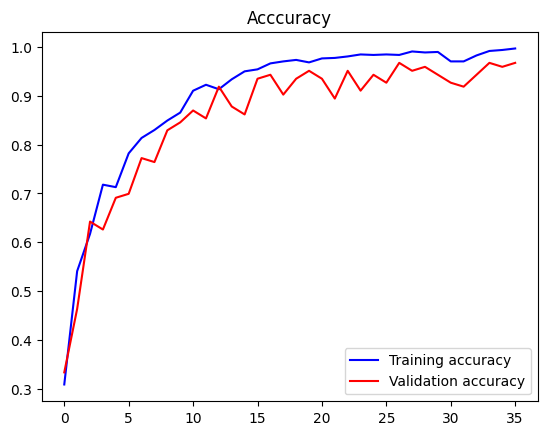

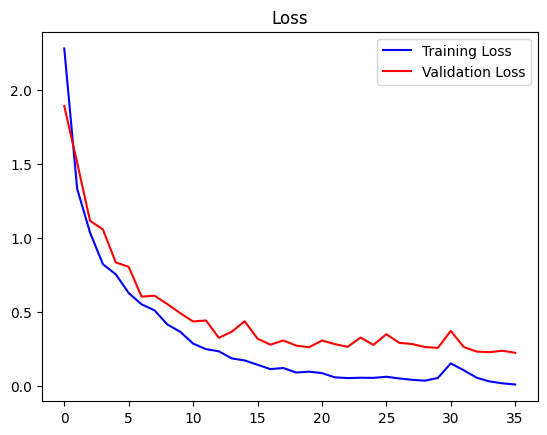

In [ ]:
#plotting accuracy and loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Acccuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [ ]:
# Simpan model ke dalam file
model.save("model.h5")

In [ ]:
from tensorflow.keras.models import load_model

#load a model from a file
loaded_model = load_model("model.h5")

#evaluation of loaded models
test_loss, test_accuracy = loaded_model.evaluate(test_features, test_labels)

4/4 [==============================] - 0s 22ms/step - loss: 0.2780 - accuracy: 0.9756


In [ ]:
model.save('/content/drive/MyDrive/Capstone/Model/model.h5')

# tflite converter and the optimizations
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter = True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

# Converts model to .tflite format
tfmodel = converter.convert()
open('/content/drive/MyDrive/Capstone/Model/model.tflite', 'wb').write(tfmodel)
pickle.dump(model, open('/content/drive/MyDrive/Capstone/Model/model.pkl', 'wb'))

# Predict

In [ ]:
#entering the user's food choices
karbohidrat = int(input("Masukkan pilihan Karbohidrat: "))
protein = int(input("Masukkan pilihan Protein: "))
sayur = int(input("Masukkan pilihan Sayur: "))
pengolahan = int(input("Masukkan pilihan Pengolahan: "))

#setting up input for prediction
input_data = np.array([[karbohidrat, protein, sayur, pengolahan]])

#making predictions using the model
predicted = np.argmax(model.predict(input_data))

#looking for class-appropriate food
makanan_sesuai_kelas = data[data['Kelas'] == predicted]['Makanan'].tolist()

#displaying a list of suitable foods
if makanan_sesuai_kelas:
    print("Makanan yang sesuai dengan pilihan Anda:")
    for makanan in makanan_sesuai_kelas:
        print(makanan)
else:
    print("Mohon maaf, makanan tidak tersedia.")

Masukkan pilihan Karbohidrat: 1
Masukkan pilihan Protein: 1
Masukkan pilihan Sayur: 1
Masukkan pilihan Pengolahan: 1
1/1 [==============================] - 0s 39ms/step
Makanan yang sesuai dengan pilihan Anda:
Sambal Cumi Pete Pedas
Pecak Lele
Sambal Udang Goreng Petai
Pecel Lele
Kepiting Asam Manis
Tumis Buncis Udang
Tumis Kembang Turi Teri
Steak Ikan Dori Panggang Saus Lemon
